In [1]:
from datetime import datetime
from pydriller import Repository
from operator import itemgetter

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

start_date = datetime(2021, 5 , 1) # current month November then I will start mining from May
repo = 'nova'
sub_folder = 'nova/'

submodule_commit = dict()
submodule_diff  = dict()

In [2]:
# start mining from the last six month while if the commit must contains /nova subfolder
for commit in Repository(repo, filepath=sub_folder, since=start_date).traverse_commits():
    for m in commit.modified_files: # see the change in each file
        ## check new_path first if it not exist check old_path (meaning the file is removed)
        split = None
        if m.new_path == None:
            split = m.old_path.split('/')            
        else:
            split = m.new_path.split('/')
        if split[0] == 'nova':
            submodule = split[1] # split[0] show nova folder, while split[1] show subfolder
            if '.py' in submodule: # if split[1] contains python file (not a folder) skip
                continue
            if submodule not in submodule_commit:
                submodule_commit[submodule] = 0
                submodule_diff[submodule]   = 0
            submodule_commit[submodule] += 1 # count number of commit
            submodule_diff[submodule]   += m.added_lines + m.deleted_lines # count number of line

# sort from maximum to minimum then select top 12
sorted_submodule_commit = sorted(submodule_commit.items(), key=itemgetter(1), reverse=True)[0:12]
sorted_submodule_diff   = sorted(submodule_diff.items(), key=itemgetter(1), reverse=True)[0:12]

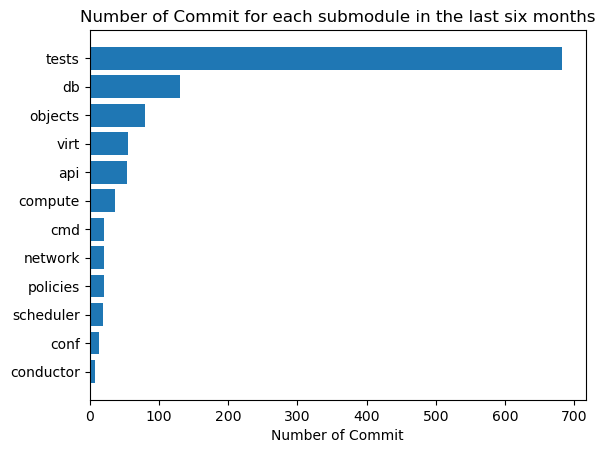

In [3]:
# plot the graph for number of commit for each module
objects = [i[0] for i in sorted_submodule_commit]
y_pos =[i for i in reversed(range(len(sorted_submodule_commit)))]
performance = [i[1] for i in sorted_submodule_commit]

plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Number of Commit')
plt.title('Number of Commit for each submodule in the last six months')
plt.savefig('commit.png')

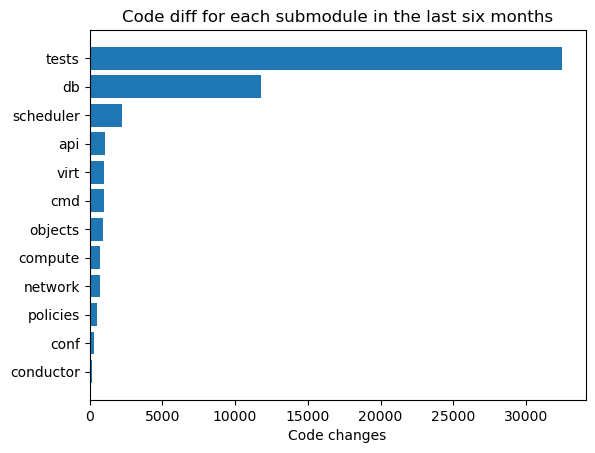

In [4]:
# plot the graph for code change for each module
objects = [i[0] for i in sorted_submodule_diff]
y_pos =[i for i in reversed(range(len(sorted_submodule_diff)))]
performance = [i[1] for i in sorted_submodule_diff]

plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Code changes')
plt.title('Code diff for each submodule in the last six months')
plt.savefig('churn.png')